In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from scipy.linalg import toeplitz

## Test data

In [88]:
INPUT_SIZE = 64
INPUT_CHANNELS = 3
OUTPUT_CHANNELS = 2

if INPUT_CHANNELS == 1:
    spike_indices = np.asarray([65,   66,   67,   68,   69,   70,   71,   72,   73,   74,   75,
          76,   77,   78,   79,   80,   81,   82,   83,   84,   85,   86,
          87,   88,   89,   90,   91,   92,   93,   94,   95,   96,   97,
          98,   99,  100,  101,  102,  103,  104,  105,  106,  107,  108,
         109,  110,  129,  130,  131,  132,  133,  134,  135,  136,  137,
         138,  139,  140,  141,  142,  143,  144,  145,  146,  147,  148,
         149,  150,  151,  152,  153,  154,  155,  156,  157,  158,  159,
         160,  161,  162,  163,  164,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  193,  194,  195,  196,  197,  198,  199,
         200,  201,  202,  203,  204,  205,  206,  207,  208,  209,  210,
         211,  212,  213,  214,  215,  257,  258,  259,  260,  261,  262,
         263,  264,  265,  266,  267,  268,  269,  270,  271,  272,  273,
         274,  275,  276,  277,  278,  279,  321,  322,  323,  324,  325,
         326,  327,  328,  329,  330,  331,  332,  333,  334,  335,  336,
         337,  338,  339,  340,  341,  342,  343,  385,  386,  387,  388,
         389,  390,  391,  392,  393,  394,  395,  396,  397,  398,  399,
         400,  401,  402,  403,  404,  405,  406,  407,  449,  450,  451,
         452,  453,  454,  455,  456,  457,  458,  459,  460,  461,  462,
         463,  464,  465,  466,  467,  468,  469,  470,  471,  507,  508,
         513,  514,  515,  516,  517,  518,  519,  520,  521,  522,  523,
         524,  525,  526,  527,  528,  529,  530,  531,  532,  533,  534,
         535,  568,  569,  570,  571,  577,  578,  579,  580,  581,  582,
         583,  584,  585,  586,  587,  588,  589,  590,  591,  592,  593,
         594,  595,  596,  597,  598,  599,  629,  630,  631,  632,  633,
         634,  641,  642,  643,  644,  645,  646,  647,  648,  649,  650,
         651,  652,  653,  654,  655,  656,  657,  658,  659,  660,  661,
         662,  663,  690,  691,  692,  693,  694,  695,  696,  697,  705,
         706,  707,  708,  709,  710,  711,  712,  713,  714,  715,  716,
         717,  718,  719,  720,  721,  722,  723,  724,  725,  726,  727,
         750,  751,  752,  753,  754,  755,  756,  757,  758,  759,  760,
         769,  770,  771,  772,  773,  774,  775,  776,  777,  778,  779,
         780,  781,  782,  783,  784,  785,  786,  787,  788,  789,  790,
         791,  810,  811,  812,  813,  814,  815,  816,  817,  818,  819,
         820,  821,  822,  823,  833,  834,  835,  836,  837,  838,  839,
         840,  841,  842,  843,  844,  845,  846,  847,  848,  849,  850,
         851,  852,  853,  854,  855,  871,  872,  873,  874,  875,  876,
         877,  878,  879,  880,  881,  882,  883,  884,  885,  886,  897,
         898,  899,  900,  901,  902,  903,  904,  905,  906,  907,  908,
         909,  910,  911,  912,  913,  914,  915,  916,  917,  918,  919,
         932,  933,  934,  935,  936,  937,  938,  939,  940,  941,  942,
         943,  944,  945,  946,  947,  948,  949,  992,  993,  994,  995,
         996,  997,  998,  999, 1000, 1001, 1002, 1003, 1004, 1005, 1006,
        1007, 1008, 1009, 1010, 1011, 1012, 1053, 1054, 1055, 1056, 1057,
        1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068,
        1069, 1070, 1071, 1072, 1073, 1074, 1075, 1114, 1115, 1116, 1117,
        1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128,
        1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1174,
        1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
        1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
        1197, 1198, 1199, 1200, 1201, 1217, 1218, 1219, 1220, 1221, 1222,
        1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1235,
        1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246,
        1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257,
        1258, 1259, 1260, 1261, 1262, 1263, 1264, 1281, 1282, 1283, 1284,
        1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295,
        1296, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308,
        1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319,
        1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1345, 1346,
        1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357,
        1358, 1359, 1360, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373,
        1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384,
        1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1409, 1410,
        1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421,
        1422, 1423, 1424, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440,
        1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451,
        1452, 1453, 1454, 1455, 1456, 1457, 1458, 1473, 1474, 1475, 1476,
        1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487,
        1488, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510,
        1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521,
        1522, 1523, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545,
        1546, 1547, 1548, 1549, 1550, 1551, 1552, 1568, 1569, 1570, 1571,
        1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582,
        1583, 1584, 1585, 1586, 1587, 1588, 1601, 1602, 1603, 1604, 1605,
        1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616,
        1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646,
        1647, 1648, 1649, 1650, 1651, 1652, 1653, 1665, 1666, 1667, 1668,
        1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679,
        1680, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712,
        1713, 1714, 1715, 1716, 1717, 1718, 1729, 1730, 1731, 1732, 1733,
        1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744,
        1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780,
        1781, 1782, 1783, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800,
        1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1837, 1838, 1839,
        1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1857, 1858,
        1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869,
        1870, 1871, 1872, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
        1912, 1913, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929,
        1930, 1931, 1932, 1933, 1934, 1935, 1936, 1972, 1973, 1974, 1975,
        1976, 1977, 1978, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
        1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2039, 2040, 2041,
        2042, 2043, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057,
        2058, 2059, 2060, 2061, 2062, 2063, 2064, 2106, 2107, 2108, 2267,
        2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278,
        2279, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2287, 2288, 2305,
        2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316,
        2317, 2318, 2319, 2320, 2321, 2322, 2323, 2331, 2332, 2333, 2334,
        2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345,
        2346, 2347, 2348, 2349, 2350, 2351, 2352, 2370, 2371, 2372, 2373,
        2374, 2375, 2376, 2377, 2378, 2379, 2380, 2381, 2382, 2383, 2384,
        2385, 2386, 2387, 2395, 2396, 2397, 2398, 2399, 2400, 2401, 2402,
        2403, 2404, 2405, 2406, 2407, 2408, 2409, 2410, 2411, 2412, 2413,
        2414, 2415, 2416, 2435, 2436, 2437, 2438, 2439, 2440, 2441, 2442,
        2443, 2444, 2445, 2446, 2447, 2448, 2449, 2450, 2451, 2459, 2460,
        2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471,
        2472, 2473, 2474, 2475, 2476, 2477, 2478, 2479, 2480, 2500, 2501,
        2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512,
        2513, 2514, 2515, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530,
        2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541,
        2542, 2543, 2544, 2565, 2566, 2567, 2568, 2569, 2570, 2571, 2572,
        2573, 2574, 2575, 2576, 2577, 2578, 2579, 2587, 2588, 2589, 2590,
        2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601,
        2602, 2603, 2604, 2605, 2606, 2607, 2608, 2630, 2631, 2632, 2633,
        2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2643, 2651,
        2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662,
        2663, 2664, 2665, 2666, 2667, 2668, 2669, 2670, 2671, 2672, 2695,
        2696, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2704, 2705, 2706,
        2707, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724,
        2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735,
        2736, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769,
        2770, 2771, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787,
        2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798,
        2799, 2800, 2825, 2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833,
        2834, 2835, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851,
        2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862,
        2863, 2864, 2890, 2891, 2892, 2893, 2894, 2895, 2896, 2897, 2898,
        2899, 2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916,
        2917, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2927,
        2928, 2955, 2956, 2957, 2958, 2959, 2960, 2961, 2962, 2963, 2971,
        2972, 2973, 2974, 2975, 2976, 2977, 2978, 2979, 2980, 2981, 2982,
        2983, 2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991, 2992, 3020,
        3021, 3022, 3023, 3024, 3025, 3026, 3027, 3035, 3036, 3037, 3038,
        3039, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049,
        3050, 3051, 3052, 3053, 3054, 3055, 3056, 3085, 3086, 3087, 3088,
        3089, 3090, 3091, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106,
        3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117,
        3118, 3119, 3120, 3150, 3151, 3152, 3153, 3154, 3155, 3215, 3216,
        3217, 3218, 3219, 3280, 3281, 3282, 3283, 3345, 3346, 3347, 3410,
        3411, 3475, 3547, 3548, 3549, 3550, 3551, 3608, 3609, 3610, 3611,
        3612, 3613, 3614, 3615, 3616, 3617, 3618, 3669, 3670, 3671, 3672,
        3673, 3674, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3682, 3683,
        3684, 3685, 3686, 3730, 3731, 3732, 3733, 3734, 3735, 3736, 3737,
        3738, 3739, 3740, 3741, 3742, 3743, 3744, 3745, 3746, 3747, 3748,
        3749, 3750, 3751, 3752, 3753, 3790, 3791, 3792, 3793, 3794, 3795,
        3796, 3797, 3798, 3799, 3800, 3801, 3802, 3803, 3804, 3805, 3806,
        3807, 3808, 3809, 3810, 3811, 3812, 3813, 3814, 3815, 3816, 3817,
        3818, 3819, 3820, 3851, 3852, 3853, 3854, 3855, 3856, 3857, 3858,
        3859, 3860, 3861, 3862, 3863, 3864, 3865, 3866, 3867, 3868, 3869,
        3870, 3871, 3872, 3873, 3874, 3875, 3876, 3877, 3878, 3879, 3880,
        3881, 3882, 3883, 3884, 3885, 3886, 3887, 3912, 3913, 3914, 3915,
        3916, 3917, 3918, 3919, 3920, 3921, 3922, 3923, 3924, 3925, 3926,
        3927, 3928, 3929, 3930, 3931, 3932, 3933, 3934, 3935, 3936, 3937,
        3938, 3939, 3940, 3941, 3942, 3943, 3944, 3945, 3946, 3947, 3948,
        3949, 3950, 3951, 3952, 3953, 3954, 3973, 3974, 3975, 3976, 3977,
        3978, 3979, 3980, 3981, 3982, 3983, 3984, 3985, 3986, 3987, 3988,
        3989, 3990, 3991, 3992, 3993, 3994, 3995, 3996, 3997, 3998, 3999,
        4000, 4001, 4002, 4003, 4004, 4005, 4006, 4007, 4008, 4009, 4010,
        4011, 4012, 4013, 4014, 4015, 4016, 4017, 4018, 4019, 4020, 4021,
        4022, 4035, 4036, 4037, 4038, 4039, 4040, 4041, 4042, 4043, 4044,
        4045, 4046, 4047, 4048, 4049, 4050, 4051, 4052, 4053, 4054, 4055,
        4056, 4057, 4058, 4059, 4060, 4061, 4062, 4063, 4064, 4065, 4066,
        4067, 4068, 4069, 4070, 4071, 4072, 4073, 4074, 4075, 4076, 4077,
        4078, 4079, 4080, 4081, 4082, 4083, 4084, 4085, 4086, 4087, 4088], dtype=int)
    if OUTPUT_CHANNELS == 1:
        filt = np.asarray([[[[1,   2, 1],
                             [0,   0, 0],
                             [-1, -2, -1]]]])
    elif OUTPUT_CHANNELS == 2:
        filt = np.asarray([[[[1,   2, 1],
                             [0,   0, 0],
                             [-1, -2, -1]]],
                           [[[0.1111, 0.1111, 0.1111],
                             [0.1111, 0.1111,  0.1111],
                             [0.1111, 0.1111, 0.1111]]]])
    else:
        assert False
elif INPUT_CHANNELS == 3:
    spike_indices = np.asarray([197, 200, 203, 206, 209, 212, 215, 218, 221, 224,
        227, 230, 233, 236, 239, 242, 245, 248, 251, 254,
        257, 260, 263, 266, 269, 272, 275, 278, 281, 284,
        287, 290, 293, 296, 299, 302, 305, 308, 311, 314,
        317, 320, 323, 326, 329, 332, 389, 392, 395, 398,
        401, 404, 407, 410, 413, 416, 419, 422, 425, 428,
        431, 434, 437, 440, 443, 446, 449, 452, 455, 458,
        461, 464, 467, 470, 473, 476, 479, 482, 485, 488,
        491, 494, 497, 500, 503, 506, 509, 512, 515, 518,
        521, 524, 581, 584, 587, 590, 593, 596, 599, 602,
        605, 608, 611, 614, 617, 620, 623, 626, 629, 632,
        635, 638, 641, 644, 647, 773, 776, 779, 782, 785,
        788, 791, 794, 797, 800, 803, 806, 809, 812, 815,
        818, 821, 824, 827, 830, 833, 836, 839, 965, 968,
        971, 974, 977, 980, 983, 986, 989, 992, 995, 998,
        1001, 1004, 1007, 1010, 1013, 1016, 1019, 1022, 1025, 1028,
        1031, 1157, 1160, 1163, 1166, 1169, 1172, 1175, 1178, 1181,
        1184, 1187, 1190, 1193, 1196, 1199, 1202, 1205, 1208, 1211,
        1214, 1217, 1220, 1223, 1349, 1352, 1355, 1358, 1361, 1364,
        1367, 1370, 1373, 1376, 1379, 1382, 1385, 1388, 1391, 1394,
        1397, 1400, 1403, 1406, 1409, 1412, 1415, 1521, 1523, 1524,
        1526, 1541, 1544, 1547, 1550, 1553, 1556, 1559, 1562, 1565,
        1568, 1571, 1574, 1577, 1580, 1583, 1586, 1589, 1592, 1595,
        1598, 1601, 1604, 1607, 1704, 1706, 1707, 1709, 1710, 1712,
        1713, 1715, 1733, 1736, 1739, 1742, 1745, 1748, 1751, 1754,
        1757, 1760, 1763, 1766, 1769, 1772, 1775, 1778, 1781, 1784,
        1787, 1790, 1793, 1796, 1799, 1887, 1889, 1890, 1892, 1893,
        1895, 1896, 1898, 1899, 1901, 1902, 1904, 1925, 1928, 1931,
        1934, 1937, 1940, 1943, 1946, 1949, 1952, 1955, 1958, 1961,
        1964, 1967, 1970, 1973, 1976, 1979, 1982, 1985, 1988, 1991,
        2070, 2072, 2073, 2075, 2076, 2078, 2079, 2081, 2082, 2084,
        2085, 2087, 2088, 2090, 2091, 2093, 2117, 2120, 2123, 2126,
        2129, 2132, 2135, 2138, 2141, 2144, 2147, 2150, 2153, 2156,
        2159, 2162, 2165, 2168, 2171, 2174, 2177, 2180, 2183, 2250,
        2252, 2253, 2255, 2256, 2258, 2259, 2261, 2262, 2264, 2265,
        2267, 2268, 2270, 2271, 2273, 2274, 2276, 2277, 2279, 2280,
        2282, 2309, 2312, 2315, 2318, 2321, 2324, 2327, 2330, 2333,
        2336, 2339, 2342, 2345, 2348, 2351, 2354, 2357, 2360, 2363,
        2366, 2369, 2372, 2375, 2430, 2432, 2433, 2435, 2436, 2438,
        2439, 2441, 2442, 2444, 2445, 2447, 2448, 2450, 2451, 2453,
        2454, 2456, 2457, 2459, 2460, 2462, 2463, 2465, 2466, 2468,
        2469, 2471, 2501, 2504, 2507, 2510, 2513, 2516, 2519, 2522,
        2525, 2528, 2531, 2534, 2537, 2540, 2543, 2546, 2549, 2552,
        2555, 2558, 2561, 2564, 2567, 2613, 2615, 2616, 2618, 2619,
        2621, 2622, 2624, 2625, 2627, 2628, 2630, 2631, 2633, 2634,
        2636, 2637, 2639, 2640, 2642, 2643, 2645, 2646, 2648, 2649,
        2651, 2652, 2654, 2655, 2657, 2658, 2660, 2693, 2696, 2699,
        2702, 2705, 2708, 2711, 2714, 2717, 2720, 2723, 2726, 2729,
        2732, 2735, 2738, 2741, 2744, 2747, 2750, 2753, 2756, 2759,
        2796, 2798, 2799, 2801, 2802, 2804, 2805, 2807, 2808, 2810,
        2811, 2813, 2814, 2816, 2817, 2819, 2820, 2822, 2823, 2825,
        2826, 2828, 2829, 2831, 2832, 2834, 2835, 2837, 2838, 2840,
        2841, 2843, 2844, 2846, 2847, 2849, 2976, 2978, 2979, 2981,
        2982, 2984, 2985, 2987, 2988, 2990, 2991, 2993, 2994, 2996,
        2997, 2999, 3000, 3002, 3003, 3005, 3006, 3008, 3009, 3011,
        3012, 3014, 3015, 3017, 3018, 3020, 3021, 3023, 3024, 3026,
        3027, 3029, 3030, 3032, 3033, 3035, 3036, 3038, 3159, 3161,
        3162, 3164, 3165, 3167, 3168, 3170, 3171, 3173, 3174, 3176,
        3177, 3179, 3180, 3182, 3183, 3185, 3186, 3188, 3189, 3191,
        3192, 3194, 3195, 3197, 3198, 3200, 3201, 3203, 3204, 3206,
        3207, 3209, 3210, 3212, 3213, 3215, 3216, 3218, 3219, 3221,
        3222, 3224, 3225, 3227, 3342, 3344, 3345, 3347, 3348, 3350,
        3351, 3353, 3354, 3356, 3357, 3359, 3360, 3362, 3363, 3365,
        3366, 3368, 3369, 3371, 3372, 3374, 3375, 3377, 3378, 3380,
        3381, 3383, 3384, 3386, 3387, 3389, 3390, 3392, 3393, 3395,
        3396, 3398, 3399, 3401, 3402, 3404, 3405, 3407, 3408, 3410,
        3411, 3413, 3414, 3416, 3522, 3524, 3525, 3527, 3528, 3530,
        3531, 3533, 3534, 3536, 3537, 3539, 3540, 3542, 3543, 3545,
        3546, 3548, 3549, 3551, 3552, 3554, 3555, 3557, 3558, 3560,
        3561, 3563, 3564, 3566, 3567, 3569, 3570, 3572, 3573, 3575,
        3576, 3578, 3579, 3581, 3582, 3584, 3585, 3587, 3588, 3590,
        3591, 3593, 3594, 3596, 3597, 3599, 3600, 3602, 3603, 3605,
        3652, 3655, 3658, 3661, 3664, 3667, 3670, 3673, 3676, 3679,
        3682, 3685, 3688, 3691, 3694, 3697, 3705, 3707, 3708, 3710,
        3711, 3713, 3714, 3716, 3717, 3719, 3720, 3722, 3723, 3725,
        3726, 3728, 3729, 3731, 3732, 3734, 3735, 3737, 3738, 3740,
        3741, 3743, 3744, 3746, 3747, 3749, 3750, 3752, 3753, 3755,
        3756, 3758, 3759, 3761, 3762, 3764, 3765, 3767, 3768, 3770,
        3771, 3773, 3774, 3776, 3777, 3779, 3780, 3782, 3783, 3785,
        3786, 3788, 3789, 3791, 3792, 3794, 3844, 3847, 3850, 3853,
        3856, 3859, 3862, 3865, 3868, 3871, 3874, 3877, 3880, 3883,
        3886, 3889, 3897, 3899, 3900, 3902, 3903, 3905, 3906, 3908,
        3909, 3911, 3912, 3914, 3915, 3917, 3918, 3920, 3921, 3923,
        3924, 3926, 3927, 3929, 3930, 3932, 3933, 3935, 3936, 3938,
        3939, 3941, 3942, 3944, 3945, 3947, 3948, 3950, 3951, 3953,
        3954, 3956, 3957, 3959, 3960, 3962, 3963, 3965, 3966, 3968,
        3969, 3971, 3972, 3974, 3975, 3977, 3978, 3980, 3981, 3983,
        3984, 3986, 4036, 4039, 4042, 4045, 4048, 4051, 4054, 4057,
        4060, 4063, 4066, 4069, 4072, 4075, 4078, 4081, 4098, 4100,
        4101, 4103, 4104, 4106, 4107, 4109, 4110, 4112, 4113, 4115,
        4116, 4118, 4119, 4121, 4122, 4124, 4125, 4127, 4128, 4130,
        4131, 4133, 4134, 4136, 4137, 4139, 4140, 4142, 4143, 4145,
        4146, 4148, 4149, 4151, 4152, 4154, 4155, 4157, 4158, 4160,
        4161, 4163, 4164, 4166, 4167, 4169, 4170, 4172, 4173, 4175,
        4176, 4178, 4179, 4181, 4228, 4231, 4234, 4237, 4240, 4243,
        4246, 4249, 4252, 4255, 4258, 4261, 4264, 4267, 4270, 4273,
        4299, 4301, 4302, 4304, 4305, 4307, 4308, 4310, 4311, 4313,
        4314, 4316, 4317, 4319, 4320, 4322, 4323, 4325, 4326, 4328,
        4329, 4331, 4332, 4334, 4335, 4337, 4338, 4340, 4341, 4343,
        4344, 4346, 4347, 4349, 4350, 4352, 4353, 4355, 4356, 4358,
        4359, 4361, 4362, 4364, 4365, 4367, 4368, 4370, 4371, 4373,
        4374, 4376, 4420, 4423, 4426, 4429, 4432, 4435, 4438, 4441,
        4444, 4447, 4450, 4453, 4456, 4459, 4462, 4465, 4503, 4505,
        4506, 4508, 4509, 4511, 4512, 4514, 4515, 4517, 4518, 4520,
        4521, 4523, 4524, 4526, 4527, 4529, 4530, 4532, 4533, 4535,
        4536, 4538, 4539, 4541, 4542, 4544, 4545, 4547, 4548, 4550,
        4551, 4553, 4554, 4556, 4557, 4559, 4560, 4562, 4563, 4565,
        4566, 4568, 4569, 4571, 4612, 4615, 4618, 4621, 4624, 4627,
        4630, 4633, 4636, 4639, 4642, 4645, 4648, 4651, 4654, 4657,
        4704, 4706, 4707, 4709, 4710, 4712, 4713, 4715, 4716, 4718,
        4719, 4721, 4722, 4724, 4725, 4727, 4728, 4730, 4731, 4733,
        4734, 4736, 4737, 4739, 4740, 4742, 4743, 4745, 4746, 4748,
        4749, 4751, 4752, 4754, 4755, 4757, 4758, 4760, 4761, 4763,
        4764, 4766, 4804, 4807, 4810, 4813, 4816, 4819, 4822, 4825,
        4828, 4831, 4834, 4837, 4840, 4843, 4846, 4849, 4908, 4910,
        4911, 4913, 4914, 4916, 4917, 4919, 4920, 4922, 4923, 4925,
        4926, 4928, 4929, 4931, 4932, 4934, 4935, 4937, 4938, 4940,
        4941, 4943, 4944, 4946, 4947, 4949, 4950, 4952, 4953, 4955,
        4956, 4958, 4959, 4961, 4996, 4999, 5002, 5005, 5008, 5011,
        5014, 5017, 5020, 5023, 5026, 5029, 5032, 5035, 5038, 5041,
        5109, 5111, 5112, 5114, 5115, 5117, 5118, 5120, 5121, 5123,
        5124, 5126, 5127, 5129, 5130, 5132, 5133, 5135, 5136, 5138,
        5139, 5141, 5142, 5144, 5145, 5147, 5148, 5150, 5151, 5153,
        5154, 5156, 5188, 5191, 5194, 5197, 5200, 5203, 5206, 5209,
        5212, 5215, 5218, 5221, 5224, 5227, 5230, 5233, 5310, 5312,
        5313, 5315, 5316, 5318, 5319, 5321, 5322, 5324, 5325, 5327,
        5328, 5330, 5331, 5333, 5334, 5336, 5337, 5339, 5340, 5342,
        5343, 5345, 5346, 5348, 5349, 5351, 5380, 5383, 5386, 5389,
        5392, 5395, 5398, 5401, 5404, 5407, 5410, 5413, 5416, 5419,
        5422, 5425, 5511, 5513, 5514, 5516, 5517, 5519, 5520, 5522,
        5523, 5525, 5526, 5528, 5529, 5531, 5532, 5534, 5535, 5537,
        5538, 5540, 5541, 5543, 5544, 5546, 5572, 5575, 5578, 5581,
        5584, 5587, 5590, 5593, 5596, 5599, 5602, 5605, 5608, 5611,
        5614, 5617, 5712, 5714, 5715, 5717, 5718, 5720, 5721, 5723,
        5724, 5726, 5727, 5729, 5730, 5732, 5733, 5735, 5736, 5738,
        5739, 5741, 5764, 5767, 5770, 5773, 5776, 5779, 5782, 5785,
        5788, 5791, 5794, 5797, 5800, 5803, 5806, 5809, 5916, 5918,
        5919, 5921, 5922, 5924, 5925, 5927, 5928, 5930, 5931, 5933,
        5934, 5936, 5956, 5959, 5962, 5965, 5968, 5971, 5974, 5977,
        5980, 5983, 5986, 5989, 5992, 5995, 5998, 6001, 6117, 6119,
        6120, 6122, 6123, 6125, 6126, 6128, 6129, 6131, 6148, 6151,
        6154, 6157, 6160, 6163, 6166, 6169, 6172, 6175, 6178, 6181,
        6184, 6187, 6190, 6193, 6318, 6320, 6321, 6323, 6324, 6326,
        6803, 6806, 6809, 6812, 6815, 6818, 6821, 6824, 6827, 6830,
        6833, 6836, 6839, 6842, 6845, 6848, 6851, 6854, 6857, 6860,
        6863, 6866, 6915, 6918, 6921, 6924, 6927, 6930, 6933, 6936,
        6939, 6942, 6945, 6948, 6951, 6954, 6957, 6960, 6963, 6966,
        6969, 6995, 6998, 7001, 7004, 7007, 7010, 7013, 7016, 7019,
        7022, 7025, 7028, 7031, 7034, 7037, 7040, 7043, 7046, 7049,
        7052, 7055, 7058, 7110, 7113, 7116, 7119, 7122, 7125, 7128,
        7131, 7134, 7137, 7140, 7143, 7146, 7149, 7152, 7155, 7158,
        7161, 7187, 7190, 7193, 7196, 7199, 7202, 7205, 7208, 7211,
        7214, 7217, 7220, 7223, 7226, 7229, 7232, 7235, 7238, 7241,
        7244, 7247, 7250, 7305, 7308, 7311, 7314, 7317, 7320, 7323,
        7326, 7329, 7332, 7335, 7338, 7341, 7344, 7347, 7350, 7353,
        7379, 7382, 7385, 7388, 7391, 7394, 7397, 7400, 7403, 7406,
        7409, 7412, 7415, 7418, 7421, 7424, 7427, 7430, 7433, 7436,
        7439, 7442, 7500, 7503, 7506, 7509, 7512, 7515, 7518, 7521,
        7524, 7527, 7530, 7533, 7536, 7539, 7542, 7545, 7571, 7574,
        7577, 7580, 7583, 7586, 7589, 7592, 7595, 7598, 7601, 7604,
        7607, 7610, 7613, 7616, 7619, 7622, 7625, 7628, 7631, 7634,
        7695, 7698, 7701, 7704, 7707, 7710, 7713, 7716, 7719, 7722,
        7725, 7728, 7731, 7734, 7737, 7763, 7766, 7769, 7772, 7775,
        7778, 7781, 7784, 7787, 7790, 7793, 7796, 7799, 7802, 7805,
        7808, 7811, 7814, 7817, 7820, 7823, 7826, 7890, 7893, 7896,
        7899, 7902, 7905, 7908, 7911, 7914, 7917, 7920, 7923, 7926,
        7929, 7955, 7958, 7961, 7964, 7967, 7970, 7973, 7976, 7979,
        7982, 7985, 7988, 7991, 7994, 7997, 8000, 8003, 8006, 8009,
        8012, 8015, 8018, 8085, 8088, 8091, 8094, 8097, 8100, 8103,
        8106, 8109, 8112, 8115, 8118, 8121, 8147, 8150, 8153, 8156,
        8159, 8162, 8165, 8168, 8171, 8174, 8177, 8180, 8183, 8186,
        8189, 8192, 8195, 8198, 8201, 8204, 8207, 8210, 8280, 8283,
        8286, 8289, 8292, 8295, 8298, 8301, 8304, 8307, 8310, 8313,
        8339, 8342, 8345, 8348, 8351, 8354, 8357, 8360, 8363, 8366,
        8369, 8372, 8375, 8378, 8381, 8384, 8387, 8390, 8393, 8396,
        8399, 8402, 8475, 8478, 8481, 8484, 8487, 8490, 8493, 8496,
        8499, 8502, 8505, 8531, 8534, 8537, 8540, 8543, 8546, 8549,
        8552, 8555, 8558, 8561, 8564, 8567, 8570, 8573, 8576, 8579,
        8582, 8585, 8588, 8591, 8594, 8670, 8673, 8676, 8679, 8682,
        8685, 8688, 8691, 8694, 8697, 8723, 8726, 8729, 8732, 8735,
        8738, 8741, 8744, 8747, 8750, 8753, 8756, 8759, 8762, 8765,
        8768, 8771, 8774, 8777, 8780, 8783, 8786, 8865, 8868, 8871,
        8874, 8877, 8880, 8883, 8886, 8889, 8915, 8918, 8921, 8924,
        8927, 8930, 8933, 8936, 8939, 8942, 8945, 8948, 8951, 8954,
        8957, 8960, 8963, 8966, 8969, 8972, 8975, 8978, 9060, 9063,
        9066, 9069, 9072, 9075, 9078, 9081, 9107, 9110, 9113, 9116,
        9119, 9122, 9125, 9128, 9131, 9134, 9137, 9140, 9143, 9146,
        9149, 9152, 9155, 9158, 9161, 9164, 9167, 9170, 9255, 9258,
        9261, 9264, 9267, 9270, 9273, 9299, 9302, 9305, 9308, 9311,
        9314, 9317, 9320, 9323, 9326, 9329, 9332, 9335, 9338, 9341,
        9344, 9347, 9350, 9353, 9356, 9359, 9362, 9450, 9453, 9456,
        9459, 9462, 9465, 9645, 9648, 9651, 9654, 9657, 9840, 9843,
        9846, 9849, 10035, 10038, 10041, 10230, 10233, 10425, 10641, 10642,
        10643, 10644, 10645, 10646, 10647, 10648, 10649, 10650, 10651, 10652,
        10653, 10654, 10655, 10824, 10825, 10826, 10827, 10828, 10829, 10830,
        10831, 10832, 10833, 10834, 10835, 10836, 10837, 10838, 10839, 10840,
        10841, 10842, 10843, 10844, 10845, 10846, 10847, 10848, 10849, 10850,
        10851, 10852, 10853, 10854, 10855, 10856, 11007, 11008, 11009, 11010,
        11011, 11012, 11013, 11014, 11015, 11016, 11017, 11018, 11019, 11020,
        11021, 11022, 11023, 11024, 11025, 11026, 11027, 11028, 11029, 11030,
        11031, 11032, 11033, 11034, 11035, 11036, 11037, 11038, 11039, 11040,
        11041, 11042, 11043, 11044, 11045, 11046, 11047, 11048, 11049, 11050,
        11051, 11052, 11053, 11054, 11055, 11056, 11057, 11058, 11059, 11060,
        11190, 11191, 11192, 11193, 11194, 11195, 11196, 11197, 11198, 11199,
        11200, 11201, 11202, 11203, 11204, 11205, 11206, 11207, 11208, 11209,
        11210, 11211, 11212, 11213, 11214, 11215, 11216, 11217, 11218, 11219,
        11220, 11221, 11222, 11223, 11224, 11225, 11226, 11227, 11228, 11229,
        11230, 11231, 11232, 11233, 11234, 11235, 11236, 11237, 11238, 11239,
        11240, 11241, 11242, 11243, 11244, 11245, 11246, 11247, 11248, 11249,
        11250, 11251, 11252, 11253, 11254, 11255, 11256, 11257, 11258, 11259,
        11260, 11261, 11370, 11371, 11372, 11373, 11374, 11375, 11376, 11377,
        11378, 11379, 11380, 11381, 11382, 11383, 11384, 11385, 11386, 11387,
        11388, 11389, 11390, 11391, 11392, 11393, 11394, 11395, 11396, 11397,
        11398, 11399, 11400, 11401, 11402, 11403, 11404, 11405, 11406, 11407,
        11408, 11409, 11410, 11411, 11412, 11413, 11414, 11415, 11416, 11417,
        11418, 11419, 11420, 11421, 11422, 11423, 11424, 11425, 11426, 11427,
        11428, 11429, 11430, 11431, 11432, 11433, 11434, 11435, 11436, 11437,
        11438, 11439, 11440, 11441, 11442, 11443, 11444, 11445, 11446, 11447,
        11448, 11449, 11450, 11451, 11452, 11453, 11454, 11455, 11456, 11457,
        11458, 11459, 11460, 11461, 11462, 11553, 11554, 11555, 11556, 11557,
        11558, 11559, 11560, 11561, 11562, 11563, 11564, 11565, 11566, 11567,
        11568, 11569, 11570, 11571, 11572, 11573, 11574, 11575, 11576, 11577,
        11578, 11579, 11580, 11581, 11582, 11583, 11584, 11585, 11586, 11587,
        11588, 11589, 11590, 11591, 11592, 11593, 11594, 11595, 11596, 11597,
        11598, 11599, 11600, 11601, 11602, 11603, 11604, 11605, 11606, 11607,
        11608, 11609, 11610, 11611, 11612, 11613, 11614, 11615, 11616, 11617,
        11618, 11619, 11620, 11621, 11622, 11623, 11624, 11625, 11626, 11627,
        11628, 11629, 11630, 11631, 11632, 11633, 11634, 11635, 11636, 11637,
        11638, 11639, 11640, 11641, 11642, 11643, 11644, 11645, 11646, 11647,
        11648, 11649, 11650, 11651, 11652, 11653, 11654, 11655, 11656, 11657,
        11658, 11659, 11660, 11661, 11662, 11663, 11736, 11737, 11738, 11739,
        11740, 11741, 11742, 11743, 11744, 11745, 11746, 11747, 11748, 11749,
        11750, 11751, 11752, 11753, 11754, 11755, 11756, 11757, 11758, 11759,
        11760, 11761, 11762, 11763, 11764, 11765, 11766, 11767, 11768, 11769,
        11770, 11771, 11772, 11773, 11774, 11775, 11776, 11777, 11778, 11779,
        11780, 11781, 11782, 11783, 11784, 11785, 11786, 11787, 11788, 11789,
        11790, 11791, 11792, 11793, 11794, 11795, 11796, 11797, 11798, 11799,
        11800, 11801, 11802, 11803, 11804, 11805, 11806, 11807, 11808, 11809,
        11810, 11811, 11812, 11813, 11814, 11815, 11816, 11817, 11818, 11819,
        11820, 11821, 11822, 11823, 11824, 11825, 11826, 11827, 11828, 11829,
        11830, 11831, 11832, 11833, 11834, 11835, 11836, 11837, 11838, 11839,
        11840, 11841, 11842, 11843, 11844, 11845, 11846, 11847, 11848, 11849,
        11850, 11851, 11852, 11853, 11854, 11855, 11856, 11857, 11858, 11859,
        11860, 11861, 11862, 11863, 11864, 11919, 11920, 11921, 11922, 11923,
        11924, 11925, 11926, 11927, 11928, 11929, 11930, 11931, 11932, 11933,
        11934, 11935, 11936, 11937, 11938, 11939, 11940, 11941, 11942, 11943,
        11944, 11945, 11946, 11947, 11948, 11949, 11950, 11951, 11952, 11953,
        11954, 11955, 11956, 11957, 11958, 11959, 11960, 11961, 11962, 11963,
        11964, 11965, 11966, 11967, 11968, 11969, 11970, 11971, 11972, 11973,
        11974, 11975, 11976, 11977, 11978, 11979, 11980, 11981, 11982, 11983,
        11984, 11985, 11986, 11987, 11988, 11989, 11990, 11991, 11992, 11993,
        11994, 11995, 11996, 11997, 11998, 11999, 12000, 12001, 12002, 12003,
        12004, 12005, 12006, 12007, 12008, 12009, 12010, 12011, 12012, 12013,
        12014, 12015, 12016, 12017, 12018, 12019, 12020, 12021, 12022, 12023,
        12024, 12025, 12026, 12027, 12028, 12029, 12030, 12031, 12032, 12033,
        12034, 12035, 12036, 12037, 12038, 12039, 12040, 12041, 12042, 12043,
        12044, 12045, 12046, 12047, 12048, 12049, 12050, 12051, 12052, 12053,
        12054, 12055, 12056, 12057, 12058, 12059, 12060, 12061, 12062, 12063,
        12064, 12065, 12066, 12067, 12068, 12105, 12106, 12107, 12108, 12109,
        12110, 12111, 12112, 12113, 12114, 12115, 12116, 12117, 12118, 12119,
        12120, 12121, 12122, 12123, 12124, 12125, 12126, 12127, 12128, 12129,
        12130, 12131, 12132, 12133, 12134, 12135, 12136, 12137, 12138, 12139,
        12140, 12141, 12142, 12143, 12144, 12145, 12146, 12147, 12148, 12149,
        12150, 12151, 12152, 12153, 12154, 12155, 12156, 12157, 12158, 12159,
        12160, 12161, 12162, 12163, 12164, 12165, 12166, 12167, 12168, 12169,
        12170, 12171, 12172, 12173, 12174, 12175, 12176, 12177, 12178, 12179,
        12180, 12181, 12182, 12183, 12184, 12185, 12186, 12187, 12188, 12189,
        12190, 12191, 12192, 12193, 12194, 12195, 12196, 12197, 12198, 12199,
        12200, 12201, 12202, 12203, 12204, 12205, 12206, 12207, 12208, 12209,
        12210, 12211, 12212, 12213, 12214, 12215, 12216, 12217, 12218, 12219,
        12220, 12221, 12222, 12223, 12224, 12225, 12226, 12227, 12228, 12229,
        12230, 12231, 12232, 12233, 12234, 12235, 12236, 12237, 12238, 12239,
        12240, 12241, 12242, 12243, 12244, 12245, 12246, 12247, 12248, 12249,
        12250, 12251, 12252, 12253, 12254, 12255, 12256, 12257, 12258, 12259,
        12260, 12261, 12262, 12263, 12264, 12265, 12266,], dtype=int)

    if OUTPUT_CHANNELS == 1:
        filt = np.asarray([[[[1.0,  0.0,  -1.0],
                             [2.0,  0.0,  -2.0],
                             [1.0,  0.0,  -1.0]],
                            [[1.0,  2.0,  1.0],
                             [0.0,  0.0,  0.0],
                             [-1.0, -2.0, -1.0]],
                            [[-1.0, -1.0, -1.0],
                             [-1.0, 8.0,  -1.0],
                             [-1.0, -1.0, -1.0]]]])
    elif OUTPUT_CHANNELS == 2:
        filt = np.asarray([[[[1,   0, -1],
                             [2,   0, -2],
                             [1,   0, -1]],
                            [[1,   2, 1],
                             [0,   0, 0],
                             [-1, -2, -1]],
                            [[-1, -1, -1],
                             [-1, 8,  -1],
                             [-1, -1, -1]]],
                           [[[0.1111, 0.1111, 0.1111],
                             [0.1111, 0.1111,  0.1111],
                             [0.1111, 0.1111, 0.1111]],
                            [[0.1111, 0.1111, 0.1111],
                             [0.1111, 0.1111,  0.1111],
                             [0.1111, 0.1111, 0.1111]],
                            [[0.1111, 0.1111, 0.1111],
                             [0.1111, 0.1111,  0.1111],
                             [0.1111, 0.1111, 0.1111]]]])
    else:
        assert False
else:
    assert False

## Padding

In [89]:
# Calculate "full" output size
assert filt.shape[2] == filt.shape[3]
KERNEL_SIZE = filt.shape[2]
FULL_OUTPUT_SIZE = INPUT_SIZE + filt.shape[2] - 1

# Same padding
PAD = (KERNEL_SIZE - 1) // 2
OUTPUT_SIZE = INPUT_SIZE

# Valid padding
#PAD = 0
#OUTPUT_SIZE = INPUT_SIZE - KERNEL_SIZE + 1

## PyTorch test

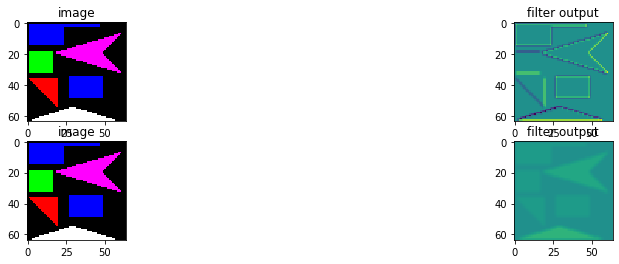

In [90]:
# Turn spike indices into image
# **NOTE** image is RGB
image = np.zeros(INPUT_SIZE * INPUT_SIZE * INPUT_CHANNELS)
image[spike_indices] = 1
image = np.reshape(image, (INPUT_SIZE, INPUT_SIZE, INPUT_CHANNELS))

# Reshape image into format expected by torch
image_torch = np.rollaxis(image, 2)
image_torch = np.expand_dims(image_torch, axis=0)

# Perform convolution
output_torch = torch.nn.functional.conv2d(torch.tensor(image_torch), torch.tensor(filt), padding=PAD).numpy()
assert output_torch.shape[2] == OUTPUT_SIZE
assert output_torch.shape[3] == OUTPUT_SIZE

# Show results
fig, axes = plt.subplots(OUTPUT_CHANNELS, 2, figsize=(16,4))
for o in range(OUTPUT_CHANNELS):
    axes_row = axes[o] if OUTPUT_CHANNELS > 1 else axes
    axes_row[0].set_title("image")
    axes_row[0].imshow(image if INPUT_CHANNELS > 1 else image[:,:,0]);
    
    axes_row[1].set_title("filter output")
    axes_row[1].imshow(output_torch[0,o,:,:], vmin=-10, vmax=10, interpolation="none")

## Toeplitz approach

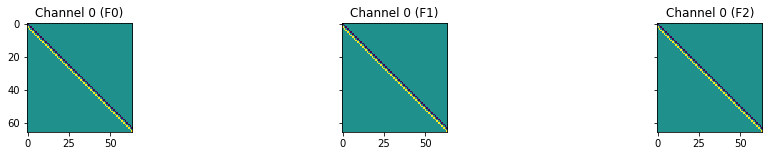

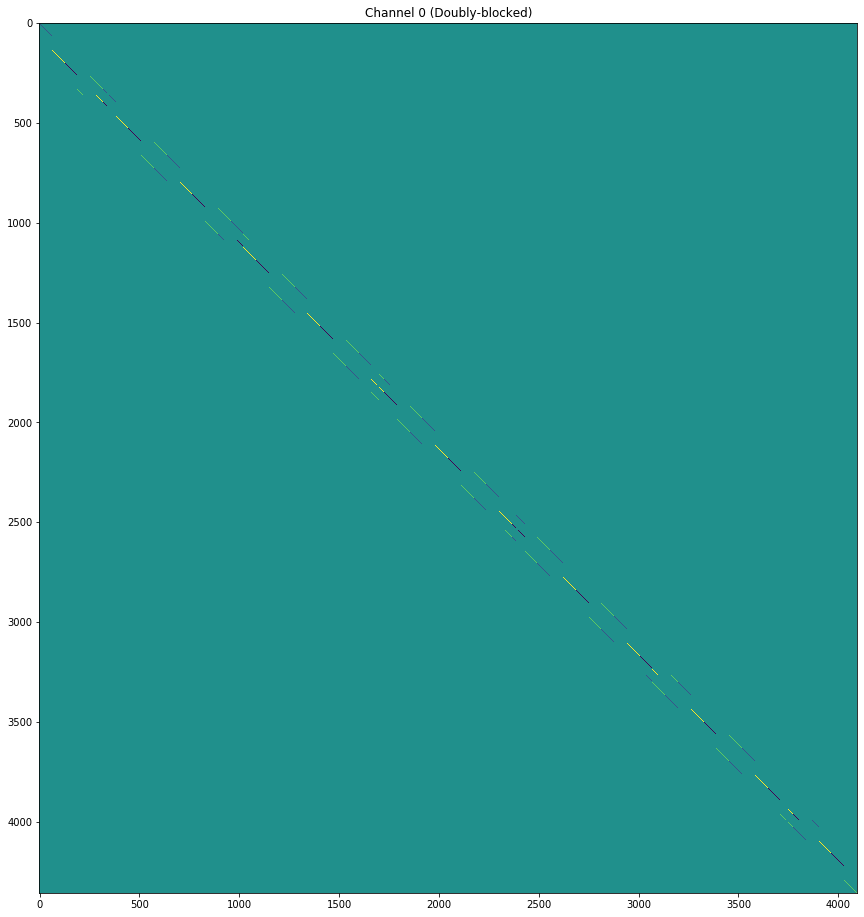

In [91]:

# Zero pad filter to output size
zero_pad_filt = np.pad(np.flip(filt, axis=3), ((0, 0), (0, 0), (FULL_OUTPUT_SIZE - filt.shape[2], 0), (0, FULL_OUTPUT_SIZE - filt.shape[3])), 
                       "constant", constant_values=0.0)
# Flip rows
zero_pad_filt = np.flip(zero_pad_filt, axis=2)

# Loop through output channels
doubly_blocked_channels = []
for o in range(zero_pad_filt.shape[0]):
    doubly_blocked_channels.append([])
    # Loop through input channels
    for i in range(zero_pad_filt.shape[1]):
        # Build list of toeplitz matrices from rows
        f_matrices = []
        for j in range(zero_pad_filt.shape[2]):
            toeplitz_col = zero_pad_filt[o,i,j,:]
            toeplitz_row = np.concatenate(((toeplitz_col[0],), np.zeros(INPUT_SIZE - 1)))
            f_matrices.append(toeplitz(toeplitz_col, toeplitz_row))

        # doubly blocked toeplitz indices: 
        # this matrix defines which toeplitz matrix from toeplitz_list goes to which part of the doubly blocked
        block_toeplitz_col = list(range(1, zero_pad_filt.shape[2] + 1))
        block_toeplitz_row = np.concatenate(((block_toeplitz_col[0],), np.zeros(INPUT_SIZE - 1, dtype=int)))
        block_indices = toeplitz(block_toeplitz_col, block_toeplitz_row)

        ## create doubly blocked matrix with zero values
        toeplitz_shape = f_matrices[0].shape # shape of one toeplitz matrix

        doubly_blocked = np.zeros((toeplitz_shape[0] * block_indices.shape[0], 
                                   toeplitz_shape[1] * block_indices.shape[1]))

        # tile toeplitz matrices for each row in the doubly blocked matrix
        for j in range(block_indices.shape[0]):
            for k in range(block_indices.shape[1]):
                start_j = j * toeplitz_shape[0]
                start_k = k * toeplitz_shape[1]
                end_j = start_j + toeplitz_shape[0]
                end_k = start_k + toeplitz_shape[1]
                doubly_blocked[start_j:end_j, start_k:end_k] = f_matrices[block_indices[j,k] - 1]

        # If this is the first input and output channel
        if i == 0 and o == 0:
            # Show some example toeplitz matrices
            fig, axes = plt.subplots(1, 3, figsize=(16,2), sharey=True)
            axes[0].imshow(f_matrices[0])
            axes[0].set_title("Channel 0 (F0)")
            axes[1].imshow(f_matrices[1])
            axes[1].set_title("Channel 0 (F1)")
            axes[2].imshow(f_matrices[2])
            axes[2].set_title("Channel 0 (F2)")

            # Show complete, double-blocked matrix
            fig, axis = plt.subplots(figsize=(16,16))
            axis.imshow(doubly_blocked)
            axis.set_title("Channel 0 (Doubly-blocked)");

        # Add double-blocked channel matrix to list
        doubly_blocked_channels[-1].append(doubly_blocked)


## Standard matrix multiply by Toeplitz
I suspect the difference in sign is due to cross-correlation vs convolution

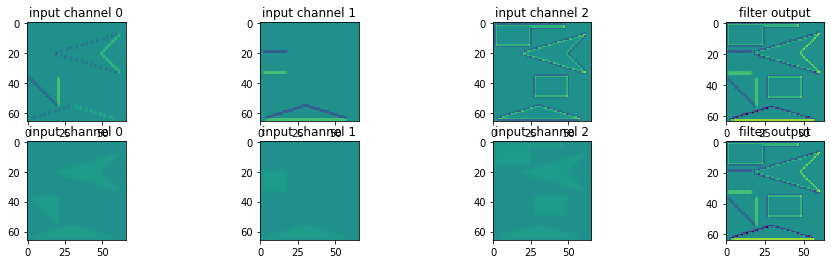

In [92]:
# Multiply each doubly-blocked channel matrix by appropriate image channel
dense_result = [[doubly_blocked_channels[o][i].dot(image[:,:,i].flatten()) for i in range(INPUT_CHANNELS)] 
                for o in range(OUTPUT_CHANNELS)]

# Sum across input channels
sum_dense_result = np.sum(dense_result, axis=1)

# Reshape and crop out output region from centre
OUTPUT_CROP = (FULL_OUTPUT_SIZE - OUTPUT_SIZE) // 2
sum_dense_result = np.reshape(sum_dense_result, (OUTPUT_CHANNELS, FULL_OUTPUT_SIZE, FULL_OUTPUT_SIZE))
sum_dense_result = sum_dense_result[:,OUTPUT_CROP:-OUTPUT_CROP,OUTPUT_CROP:-OUTPUT_CROP]

# Show results
fig, axes = plt.subplots(OUTPUT_CHANNELS, 1 + INPUT_CHANNELS, figsize=(16,4))
for o in range(OUTPUT_CHANNELS):
    axes_row = axes[o] if OUTPUT_CHANNELS > 1 else axes
    for i in range(INPUT_CHANNELS):
        axes_row[i].set_title("input channel %u" % i)
        axes_row[i].imshow(np.reshape(dense_result[o][i], (FULL_OUTPUT_SIZE, FULL_OUTPUT_SIZE)), 
                           vmin=-10, vmax=10, interpolation="none")

    axes_row[-1].set_title("filter output")
    axes_row[-1].imshow(sum_dense_result[0], vmin=-10, vmax=10, interpolation="none")

assert np.allclose(sum_dense_result.flatten(), output_torch.flatten())

## Sparse, spiking approach
We're not actually multiplying - just summing weights from rows where there's spikes

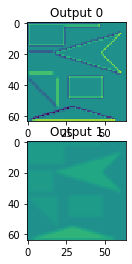

In [93]:
sparse_spike_output = np.zeros((OUTPUT_CHANNELS, OUTPUT_SIZE * OUTPUT_SIZE))

# Loop through spikes
for pre in spike_indices:
    # Split pre into row, column and channel
    pre_row = (pre // INPUT_CHANNELS) // INPUT_SIZE
    pre_col = (pre // INPUT_CHANNELS) % INPUT_SIZE
    pre_chan = pre % INPUT_CHANNELS
    
    # Loop through output channels
    for o in range(OUTPUT_CHANNELS):
        # Determine which column of blocks contains pre
        # **NOTE** that the columns of the Toeplitz matrix are indexed rows
        # Rotate row of zero-padded filter corresponding to each block and concatenate together
        col_test = np.concatenate([np.pad(zero_pad_filt[o, pre_chan, max(-1, i + OUTPUT_CROP - pre_row)], 
                                          (pre_col, 0))[:FULL_OUTPUT_SIZE]
                                   for i in range(OUTPUT_SIZE)])
        col_test = np.reshape(col_test, (OUTPUT_SIZE, FULL_OUTPUT_SIZE))
        
        # Add to output
        sparse_spike_output[o] += col_test[:,OUTPUT_CROP:-OUTPUT_CROP].flatten()

square_sparse_spike_output = np.reshape(sparse_spike_output, (OUTPUT_CHANNELS, OUTPUT_SIZE, OUTPUT_SIZE))

fig, axes = plt.subplots(OUTPUT_CHANNELS)
for o in range(OUTPUT_CHANNELS):
    ax = axes[o] if OUTPUT_CHANNELS > 1 else axes
    ax.imshow(square_sparse_spike_output[o], vmin=-10, vmax=10)
    ax.set_title("Output %u" % o);

assert np.allclose(output_torch.flatten(), square_sparse_spike_output.flatten())


## Sparser, spiking approach
There's no point in using the zero-padded filters -  we can ignore zeroed rows and copy non-added columns into correct place rather than rotating

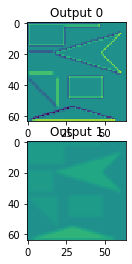

In [94]:
sparser_spike_output = np.zeros((OUTPUT_CHANNELS, FULL_OUTPUT_SIZE * FULL_OUTPUT_SIZE))

# Loop through spikes
for pre in spike_indices:
    # Split pre into row, column and channel
    pre_row = (pre // INPUT_CHANNELS) // INPUT_SIZE
    pre_col = (pre // INPUT_CHANNELS) % INPUT_SIZE
    pre_chan = pre % INPUT_CHANNELS
    
    # Get length of filter row to apply here
    row_len = min(filt.shape[3], FULL_OUTPUT_SIZE - pre_col)
    
    for o in range(OUTPUT_CHANNELS):
        # Loop through filter rows
        for i in range(pre_row, min(FULL_OUTPUT_SIZE, pre_row + filt.shape[2])):
            # Extract row of filter
            # **NOTE** from the POV of connectivity matrices, the columns of the Toeplitz matrix are the rows
            filter_row_idx = filt.shape[2] - (i - pre_row) - 1
            filter_row = filt[o, pre_chan, filter_row_idx]

            # Place it into correct slice of output
            start_out = (i * FULL_OUTPUT_SIZE) + pre_col
            end_out = start_out + row_len
            sparser_spike_output[o,start_out:end_out] += filter_row[-1:-row_len-1:-1]

square_sparser_spike_output = np.reshape(sparser_spike_output, (OUTPUT_CHANNELS, FULL_OUTPUT_SIZE, FULL_OUTPUT_SIZE))
square_sparser_spike_output = square_sparser_spike_output[:,OUTPUT_CROP:-OUTPUT_CROP,OUTPUT_CROP:-OUTPUT_CROP]

fig, axes = plt.subplots(OUTPUT_CHANNELS)
for o in range(OUTPUT_CHANNELS):
    ax = axes[o] if OUTPUT_CHANNELS > 1 else axes
    ax.imshow(square_sparser_spike_output[o], vmin=-10, vmax=10)
    ax.set_title("Output %u" % o);

assert np.allclose(output_torch.flatten(), square_sparser_spike_output.flatten())


## Sparser, spiking approach rearranged for parallel implementation
If we re-arrange the loops slightly we're closer to something that could be efficiently postsynaptically parallelised

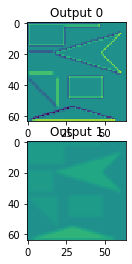

In [95]:
sparser_parallel_spike_output = np.zeros((OUTPUT_CHANNELS, OUTPUT_SIZE * OUTPUT_SIZE))

# Parallelise across filter dimensions
for kern_out_channel in range(filt.shape[0]):
    for kern_row in range(filt.shape[2]):
        for kern_col in range(filt.shape[3]):
            # Extract vector of filter channels used by all spikes 
            filter_channels = filt[kern_out_channel,:,filt.shape[2] - kern_row - 1,filt.shape[3] - kern_col - 1]

            # Loop through spikes
            for pre in spike_indices:
                # Split pre into row, column and channel
                pre_row = (pre // INPUT_CHANNELS) // INPUT_SIZE
                pre_col = (pre // INPUT_CHANNELS) % INPUT_SIZE
                pre_chan = pre % INPUT_CHANNELS

                # If we haven't gone off edge of output
                post_row = pre_row + kern_row - OUTPUT_CROP
                post_col = pre_col + kern_col - OUTPUT_CROP
                if post_row >= 0 and post_row < OUTPUT_SIZE and post_col >= 0 and post_col < OUTPUT_SIZE:
                    post_ind = (post_row * OUTPUT_SIZE) + post_col

                    # Update output (coalesced reading of filter row and no collisions on atomic add)
                    sparser_parallel_spike_output[kern_out_channel,post_ind] += filter_channels[pre_chan]

square_sparser_parallel_spike_output = np.reshape(sparser_parallel_spike_output, (OUTPUT_CHANNELS, OUTPUT_SIZE, OUTPUT_SIZE))

fig, axes = plt.subplots(OUTPUT_CHANNELS)
for o in range(OUTPUT_CHANNELS):
    ax = axes[o] if OUTPUT_CHANNELS > 1 else axes
    ax.imshow(square_sparser_parallel_spike_output[o], vmin=-10, vmax=10)
    ax.set_title("Output %u" % o);

assert np.allclose(output_torch.flatten(), square_sparser_parallel_spike_output.flatten())
